In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILENAME = "../data/KarateClub.csv"

In [3]:
graph = nx.Graph()

with open(FILENAME) as fd:
    for line in fd:
        el = map(int, line.split(';'))
        graph.add_edge(*el)

In [4]:
clusters = nx.clustering(graph)
pd_clusters = pd.DataFrame(clusters.items(), columns=["ID", "CC"])
pd_clusters

,ID,CC
0,2,0.333333
1,1,0.150000
2,3,0.244444
3,4,0.666667
4,5,0.666667
5,6,0.500000
6,7,0.500000
7,8,1.000000
8,9,0.500000
9,10,0.000000


In [5]:
nx.average_clustering(graph)

0.5706384782076823

In [6]:
stupne_vrcholu = dict(graph.degree())
stupne_vrcholu = pd.DataFrame(stupne_vrcholu.items(), columns=["ID", "stupen"])
stupne_vrcholu

,ID,stupen
0,2,9
1,1,16
2,3,10
3,4,6
4,5,3
5,6,4
6,7,4
7,8,4
8,9,5
9,10,2


In [7]:
merge = pd.merge(pd_clusters, stupne_vrcholu)
sums = merge.groupby("stupen")["CC"].mean().reset_index(name="CC_avg")
sums.rename(columns={"stupen": "d"}, inplace=True)
sums

,d,CC_avg
0,1,0.000000
1,2,0.909091
2,3,0.444444
3,4,0.555556
4,5,0.500000
5,6,0.433333
6,9,0.333333
7,10,0.244444
8,12,0.196970
9,16,0.150000


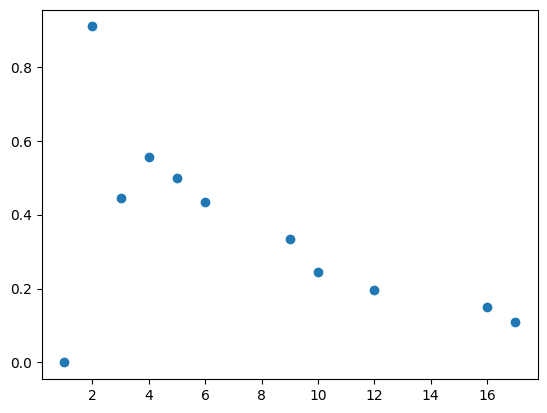

In [8]:
plt.plot(sums["d"], sums["CC_avg"], 'o')

In [9]:
distances = nx.floyd_warshall(graph)
n = len(distances)
closeness = np.zeros((n,), dtype=np.float64)
for i in distances:
    sum = 0
    for j in distances:
        sum += distances[i][j]
    closeness[i - 1] = n / sum

closeness = pd.DataFrame([(i + 1, el,) for i, el in enumerate(closeness)], columns=['ID', 'closeness'])
closeness

,ID,closeness
0,1,0.586207
1,2,0.500000
2,3,0.576271
3,4,0.478873
4,5,0.390805
5,6,0.395349
6,7,0.395349
7,8,0.453333
8,9,0.531250
9,10,0.447368


In [10]:
out = pd.merge(stupne_vrcholu, pd_clusters).merge(closeness).sort_values("ID")
out

,ID,stupen,CC,closeness
1,1,16,0.150000,0.586207
0,2,9,0.333333,0.500000
2,3,10,0.244444,0.576271
3,4,6,0.666667,0.478873
4,5,3,0.666667,0.390805
5,6,4,0.500000,0.395349
6,7,4,0.500000,0.395349
7,8,4,1.000000,0.453333
8,9,5,0.500000,0.531250
9,10,2,0.000000,0.447368


In [11]:
out.to_csv("out.csv", index=False)